# プロジェクト

配点
- Q1 50P
- Q2 50P

In [187]:
import pandas as pd
import numpy as  np
import csv
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot  as plt
%matplotlib inline

# 必要なモジュールがあれば適宜追加してください
# 各コードセル内で追加しもらっても大丈夫です

## Q1
UCI Machine Learning Repositoryに公開されているワインの品質データセットを用いて、ワインの理化学検査結果に基づく特徴量からワインの品質を予測することを考えます。

以下では***白ワイン***のデータセットを使用します。（赤ワインのデータセットではないことに注意してください）

[Wine Quality Data Set ](https://archive.ics.uci.edu/ml/datasets/wine+quality)

各ワインのデータは以下の11種類の特徴量からなります。
- 1 - fixed acidity 
- 2 - volatile acidity 
- 3 - citric acid 
- 4 - residual sugar 
- 5 - chlorides 
- 6 - free sulfur dioxide 
- 7 - total sulfur dioxide 
- 8 - density 
- 9 - pH 
- 10 - sulphates 
- 11 - alcohol 

また、各ワインには0から10の品質スコアが付与さています。11種類の特徴量を元にワインの品質スコアを線形回帰することでワインの品質を予測することを考えます。

データ分析の実践のノートブック（practical_ds.ipynb）を参考に、以下の各Qに従ってワインの品質を予測するモデルの学習と評価を行う一連のコードを実装しその実行結果を表示してください。各Qについて簡単な考察を記述してください。その他に工夫した点があればそれについても記述をしてください。

授業で学んだ内容を元に適切に分析を行っているか、独自の創意工夫があるか、を主に評価します。

コードセルや説明用のマークダウンセルは必要な分だけ追加してください。マークダウンセルに記述する際は以下の記法を参考にしてください。

[マークダウンセルの記法](https://jupyter.brynmawr.edu/services/public/dblank/Jupyter%20Notebook%20Users%20Manual.ipynb#4.-Using-Markdown-Cells-for-Writing)

In [188]:
# 白ワインデータセットの読み込み
df= pd.read_csv("winequality-white.csv", sep=";")

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [190]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Q データの観察と前処理（5P）
- それぞれの特徴量の記述統計量、ばらつき・分布はどのようになっているでしょうか
- 欠損値、外れ値、重複データはあるでしょうか
- 特徴量間の相関はどのようになっているでしょうか
- 特徴量のスケーリング、標準化は必要でしょうか

### Q 単回帰（5P）
1つの特徴量を元に単純な単回帰モデルを学習しこのタスクのベースラインとなる精度を確認しましょう。

データセットを訓練データとテストデータに分けます。

訓練データを用いてモデルの学習を行い、テストデータでモデルを評価してください。
- どの特徴量を使うのがよいでしょうか
- 単純な単回帰モデルではどの程度の精度が期待できるでしょうか

### Q 重回帰（10P）
複数の特徴量を元に重回帰モデルを学習し精度を確認しましょう。

データセットを訓練データとテストデータに分けます。

異なる特徴量の組み合わせによるモデルの学習を複数通り試し、訓練データを用いた交差検証でそれぞれのモデルを評価します。
交差検証の結果を元に、適切な特徴量の組み合わせで学習したモデルについて最終的にテストデータでモデルを評価してください。
- どの特徴量の組み合わせを使うのがよいでしょうか
- 重回帰モデルではどの程度の精度が期待できるでしょうか

### Q モデル選択（20P）
特徴量の選択や作成によりモデルを複雑にして精度を向上させることを考えます。
- どのような特徴量を作成・選択すればよいでしょうか
    - 特徴量作成：非線形変換、交差項、多項式、ドメイン知識の利用など
    - 特徴量選択：探索、相関・情報量、正則化など

データセットを訓練データとテストデータに分けます。

特徴量の選択や作成により異なるモデルの学習を複数通り試し、訓練データを用いた交差検証でそれぞれのモデルを評価しモデルを選択してください。必要であれば最適なハイパーパラメータ（多項式の次数や正則化の係数など）を交差検証で決定してください。
-  選択したモデルの複雑性は適切でしょうか
    - アンダーフィッティング（High Bias）やオーバーフィッティング（High Variance）になっていないでしょうか

交差検証の結果を元に選択したモデルについて最終的にテストデータでモデルを評価してください。
- 単純なモデルに比べてどれぐらい精度が向上したでしょうか。どのような要因で精度が向上したといえるでしょうか

### Q モデルの実運用（10P）
- 以上の結果、最終的にどのようなモデルを選択するのがよいと言えるでしょうか。
- 今回のモデルを実際にワイン工場で品質予測システムとして実展開するにはどのようなことを検討する必要があるでしょうか

## Q2
2020年度版のSSDSE（教育用標準データセット）の市町村別データを元に、市町村の保育所等数（J2503）を予測するモデルを学習し評価を行なってください。

[2020年度版SSDSE（教育用標準データセット）](https://www.nstac.go.jp/SSDSE/)

[SSDSEの解説](https://www.nstac.go.jp/SSDSE/data/2020/kaisetsu-2020A.pdf)

データは訓練データとテストデータに分割した上で、訓練データを元に適切なモデルを選択、学習した上でテストデータでモデルを評価してください。
（各統計量は調査年度が異なるのですが、ある共通年度の統計量と仮定してもらって大丈夫です）

必要であればe-Statから追加の統計データをダウンロードして利用してください。

[e-Statから地域別データをダウンロードする手順](https://www.nstac.go.jp/SSDSE/data/2019/eStat-2019.pdf)

分析のためのコードと結果および考察を報告してください。

授業で学んだ内容を元に適切に分析を行っているか、独自の創意工夫があるか、を主に評価します。

コードセルや説明用のマークダウンセルは必要な分だけ追加してください。マークダウンセルに記述する際は以下の記法を参考にしてください。

[マークダウンセルの記法](https://jupyter.brynmawr.edu/services/public/dblank/Jupyter%20Notebook%20Users%20Manual.ipynb#4.-Using-Markdown-Cells-for-Writing)

In [191]:
# SSDSE-2020A（市区町村データ） 2,3行目（日本語ヘッダ）は読み飛ばしています
df = pd.read_csv('SSDSE-2020A.csv',  skiprows=[1,2], encoding='utf_8')
df.head(10)

,code,prefecture,municipality,A1101,A110101,A110102,A1102,A110201,A110202,A1301,...,H6131,H6132,I510120,I5102,I5103,I6100,I6200,I6300,J2503,J2506
0,R01100,北海道,札幌市,1952356,910614,1041742,1937785,903535,1034250,221013,...,8502,355,178,1351,1229,6614,2113,5398,287,26613
1,R01202,北海道,函館市,265979,120376,145603,264537,119819,144718,27131,...,1749,41,28,210,129,801,183,680,49,3524
2,R01203,北海道,小樽市,121924,54985,66939,121415,54722,66693,11171,...,778,17,12,83,78,322,102,326,22,1370
3,R01204,北海道,旭川市,339605,156402,183203,335678,154716,180962,37173,...,1743,65,36,240,175,1339,254,867,67,5715
4,R01205,北海道,室蘭市,88564,43143,45421,88203,42935,45268,9185,...,621,11,6,55,44,272,63,196,10,1039
5,R01206,北海道,釧路市,174742,82185,92557,174120,81942,92178,19400,...,1151,29,15,81,91,357,107,347,26,1701
6,R01207,北海道,帯広市,169327,80994,88333,168800,80736,88064,20566,...,1378,32,18,103,97,493,138,395,31,2774
7,R01208,北海道,北見市,121226,58020,63206,120936,57884,63052,13570,...,663,28,12,65,54,226,79,212,25,1446
8,R01209,北海道,夕張市,8843,4092,4751,8755,4089,4666,500,...,40,0,0,6,5,10,9,15,3,92
9,R01210,北海道,岩見沢市,84499,39319,45180,84215,39201,45014,8983,...,381,10,5,59,48,182,63,137,18,1193


### 参考
単純にすべての特徴量でリッジ回帰した場合

Optimal alpha: 10.0


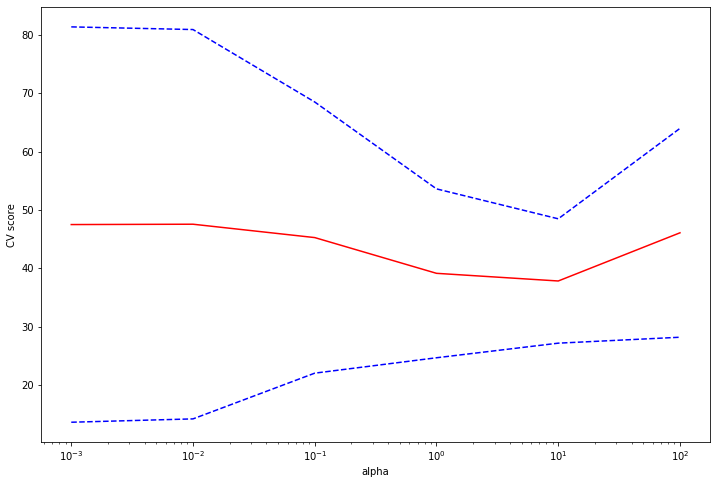

In [192]:
# コード、都道府県名、市町村名、保育所数、在所児数は除く
# 都道府県名はone hot　encodingで特徴量にしてもよいがここでは除く
X=df.drop(['code','prefecture', 'municipality', 'J2503', 'J2506'], axis=1).values
y=df[['J2503']].values # 保育所数

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# 正則化係数[0.001, 0.01, 0.1, 1, 10, 100]を交差検証で決定
alpha_s = np.logspace(-3, 2, 6, base=10) 
scores = [] 
scores_std = [] 
for a in alpha_s:
    # 標準化とリッジ回帰のパイプライン
    model = make_pipeline(StandardScaler(), Ridge(alpha=a))
    # 交差検証
    score = cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=5)
    # 交差検証スコアの平均
    scores.append(-np.mean(score))
    # 交差検証スコアの偏差
    scores_std.append(-np.std(score))

# 交差検証スコアの可視化
plt.figure(figsize=(12, 8))
plt.semilogx(alpha_s, scores,  'r') 
plt.semilogx(alpha_s, np.array(scores) + np.array(scores_std), 'b--') 
plt.semilogx(alpha_s, np.array(scores) - np.array(scores_std), 'b--')
plt.ylabel('CV score')
plt.xlabel('alpha');

# 最適な正則化係数
optimal_alpha = alpha_s[np.argmin(scores)]
print("Optimal alpha: {}".format(optimal_alpha))

In [193]:
# テストデータで評価
model = make_pipeline(StandardScaler(), Ridge(alpha=optimal_alpha))
model.fit(X_train,y_train)

# 訓練データ誤差
y_predicted_train = model.predict(X_train)
train_loss =mean_squared_error(y_train,y_predicted_train)
print('Train Loss', train_loss)

# テストデータ誤差
y_predicted_test = model.predict(X_test) 
test_loss = mean_squared_error(y_test,y_predicted_test)
print('Test Loss', test_loss)

# 決定係数
test_r2 = r2_score(y_test,y_predicted_test)
print('R2', test_r2)

Train Loss 14.117017334141893
Test Loss 24.493798612387263
R2 0.9712932796502872
